In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Load a sample dataset (you can replace this with your own dataset)
data = load_digits()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print("Test accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/50
45/45 [==============================] - 2s 12ms/step - loss: 2.4803 - accuracy: 0.2136 - val_loss: 1.8152 - val_accuracy: 0.7000
Epoch 2/50
45/45 [==============================] - 0s 6ms/step - loss: 1.7787 - accuracy: 0.4802 - val_loss: 1.1647 - val_accuracy: 0.8361
Epoch 3/50
45/45 [==============================] - 0s 6ms/step - loss: 1.3291 - accuracy: 0.6479 - val_loss: 0.7538 - val_accuracy: 0.8889
Epoch 4/50
45/45 [==============================] - 0s 5ms/step - loss: 1.0443 - accuracy: 0.7203 - val_loss: 0.5564 - val_accuracy: 0.9139
Epoch 5/50
45/45 [==============================] - 0s 7ms/step - loss: 0.8785 - accuracy: 0.7884 - val_loss: 0.4647 - val_accuracy: 0.9194
Epoch 6/50
45/45 [==============================] - 0s 6ms/step - loss: 0.8280 - accuracy: 0.7954 - val_loss: 0.4068 - val_accuracy: 0.9389
Epoch 7/50
45/45 [==============================] - 0s 6ms/step - loss: 0.7049 - accuracy: 0.8281 - val_loss: 0.3686 - val_accuracy: 0.9417
Epoch 8/50
45/45 [=

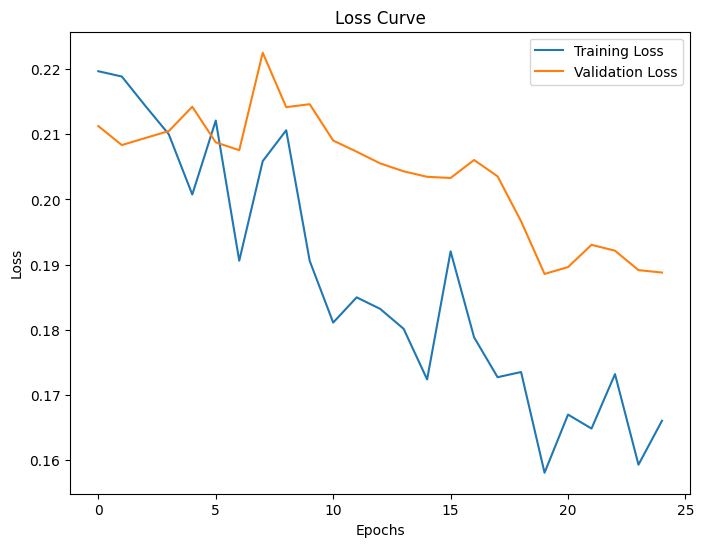

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
